In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from analysis_helpers import get_correlations
import plotly.express as px
from googletrans import Translator
from wordcloud import WordCloud
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import chart_studio
import chart_studio.plotly as py
from analysis_helpers import *

In [ ]:
# Set your credentials
chart_studio.tools.set_credentials_file(
    username=os.environ['PLOTLY_CHART_USER_NAME'], 
    api_key=os.environ['PLOTLY_CHART_API_KEY']
)

In [544]:
df = pd.read_parquet('../data/used_car_engineered_data.parquet')
df.head()

price (HUF)  condition  \
link                                                                         
https://www.hasznaltauto.hu/szemelyauto/volkswa...      6895000     Kitűnő   
https://www.hasznaltauto.hu/szemelyauto/mercede...      9999999  Megkímélt   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...      4995000     Kitűnő   
https://www.hasznaltauto.hu/szemelyauto/renault...      3499000     Kitűnő   
https://www.hasznaltauto.hu/szemelyauto/mercede...      7990000     Normál   

                                                                          design  \
link                                                                               
https://www.hasznaltauto.hu/szemelyauto/volkswa...                         Sedan   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Városi terepjáró (crossover)   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...  Városi terepjáró (crossover)   
https://www.hasznaltauto.hu/szemelyauto/renault...  Városi terepjáró (crossover)   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Városi terepjáró (crossover)   

                                                                            vehicle history  \
link                                                                                          
https://www.hasznaltauto.hu/szemelyauto/volkswa...  Elérhető autó-előélet alvázszám alapján   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Elérhető autó-előélet alvázszám alapján   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...  Elérhető autó-előélet alvázszám alapján   
https://www.hasznaltauto.hu/szemelyauto/renault...  Elérhető autó-előélet alvázszám alapján   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Elérhető autó-előélet alvázszám alapján   

                                                    financing  \
link                                                            
https://www.hasznaltauto.hu/szemelyauto/volkswa...         25   
https://www.hasznaltauto.hu/szemelyauto/mercede...         20   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...         20   
https://www.hasznaltauto.hu/szemelyauto/renault...        100   
https://www.hasznaltauto.hu/szemelyauto/mercede...         20   

                                                    clock position (km)  \
link                                                                      
https://www.hasznaltauto.hu/szemelyauto/volkswa...               110000   
https://www.hasznaltauto.hu/szemelyauto/mercede...               119300   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...                70000   
https://www.hasznaltauto.hu/szemelyauto/renault...               100000   
https://www.hasznaltauto.hu/szemelyauto/mercede...                74760   

                                                    shippable persons number  \
link                                                                           
https://www.hasznaltauto.hu/szemelyauto/volkswa...                       5.0   
https://www.hasznaltauto.hu/szemelyauto/mercede...                       5.0   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...                       5.0   
https://www.hasznaltauto.hu/szemelyauto/renault...                       5.0   
https://www.hasznaltauto.hu/szemelyauto/mercede...                       5.0   

                                                    number of doors     color  \
link                                                                            
https://www.hasznaltauto.hu/szemelyauto/volkswa...              4.0    fekete   
https://www.hasznaltauto.hu/szemelyauto/mercede...              5.0     fehér   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...              5.0       kék   
https://www.hasznaltauto.hu/szemelyauto/renault...              5.0  sötétkék   
https://www.hasznaltauto.hu/szemelyauto/mercede...              5.0     fehér   

                                                    own weight (kg)  ...  \
link                                                           

In [803]:
nan_ratio = df.isna().mean()
high_nan = nan_ratio[nan_ratio > 0.51]
high_nan

winter tire width            0.860442
winter tires apect ratio     0.860442
winter tires rim diameter    0.860442
back summer tire width       0.912113
back winter tire width       0.962875
dtype: float64

In [805]:
df.drop(columns=high_nan.keys(), inplace=True)

In [540]:
# Change some car type name
df['design'] = df['design'].replace({'Egyterű': 'Egyterű auto', 'Lépcsőshátú':'Sedan'})

In [648]:
df.rename(columns={'performance (kW)':'power (kW)'}, inplace=True)

In [806]:
df_types = pd.DataFrame(df.dtypes).reset_index()
for row in df_types.iterrows():
    print(row[1].values)

['price (HUF)' dtype('int64')]
['condition' dtype('O')]
['design' dtype('O')]
['vehicle history' dtype('O')]
['financing' dtype('int64')]
['clock position (km)' dtype('int64')]
['shippable persons number' dtype('float64')]
['number of doors' dtype('float64')]
['color' dtype('O')]
['own weight (kg)' dtype('float64')]
['total weight (kg)' dtype('float64')]
['trunk (l)' dtype('float64')]
['type of climate' dtype('O')]
['roof' dtype('O')]
['fuel' dtype('O')]
['cylinder capacity (cm3)' dtype('float64')]
['power (kW)' dtype('float64')]
['cylinder arrangement' dtype('O')]
['drive' dtype('O')]
['gearbox' dtype('O')]
['nature of documents' dtype('O')]
['MOT is valid (days)' dtype('float64')]
['buy_from_shop' dtype('bool')]
['term' dtype('O')]
['summer tire width' dtype('float64')]
['summer tires apect ratio' dtype('float64')]
['summer tires construction type' dtype('O')]
['summer tires rim diameter' dtype('float64')]
['winter tires construction type' dtype('O')]
['back summer tires construction

In [842]:
# Define feature types
cols = df.columns
numeric_features = df.select_dtypes(include=['float','int']).columns
tfid_features = list(cols[cols.str.contains('tfid')])
numeric_features = [x for x in numeric_features if x not in tfid_features + ['word_count']]

binary_features = df.select_dtypes(include=['bool']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [810]:
correlations = get_correlations(df)
#correlations.to_csv('correlations.csv')
correlations.head()

variable1                  variable2  correlation
546           own weight (kg)          total weight (kg)     0.932804
1201        summer tire width  summer tires rim diameter     0.837598
551           own weight (kg)          summer tire width     0.812986
659         summer tire width          total weight (kg)     0.797547
873   cylinder capacity (cm3)                 power (kW)     0.794309

In [843]:
# Filter correlations where 'price (HUF)' is either 'variable1' or 'variable2'
correlations_price = correlations[(correlations['variable1'] == 'price (HUF)') | (correlations['variable2'] == 'price (HUF)')].copy()

# Calculate the absolute correlation and add it as a new column
correlations_price['abs_correlation'] = correlations_price['correlation'].abs()

# Create a new column 'other_variable' that contains the name of the variable that is not 'price (HUF)'
correlations_price['other_variable'] = correlations_price.apply(lambda row: row['variable1'] if row['variable2'] == 'price (HUF)' else row['variable2'], axis=1)

# Filter rows where the absolute correlation is at least 0.25
correlations_filtered = correlations_price[correlations_price.other_variable.isin(numeric_features)]

# Reset the index
correlations_filtered.reset_index(drop=True, inplace=True)

correlations_filtered

variable1                  variable2  correlation  \
0                power (kW)                price (HUF)     0.704116   
1               price (HUF)  summer tires rim diameter     0.641930   
2           own weight (kg)                price (HUF)     0.600613   
3               price (HUF)          summer tire width     0.576939   
4               price (HUF)          total weight (kg)     0.527459   
5               price (HUF)              speaker count     0.510698   
6   cylinder capacity (cm3)                price (HUF)     0.445519   
7       MOT is valid (days)                price (HUF)     0.254855   
8               price (HUF)                  trunk (l)     0.103266   
9               price (HUF)   shippable persons number     0.017241   
10          number of doors                price (HUF)    -0.005818   
11                financing                price (HUF)    -0.135658   
12              price (HUF)   summer tires apect ratio    -0.384198   
13      clock position (km)                price (HUF)    -0.422483   
14                 age_year                price (HUF)    -0.531256   

    abs_correlation             other_variable  
0          0.704116                 power (kW)  
1          0.641930  summer tires rim diameter  
2          0.600613            own weight (kg)  
3          0.576939          summer tire width  
4          0.527459          total weight (kg)  
5          0.510698              speaker count  
6          0.445519    cylinder capacity (cm3)  
7          0.254855        MOT is valid (days)  
8          0.103266                  trunk (l)  
9          0.017241   shippable persons number  
10         0.005818            number of doors  
11         0.135658                  financing  
12         0.384198   summer tires apect ratio  
13         0.422483        clock position (km)  
14         0.531256                   age_year

In [839]:
correlations_filtered[['other_variable', 'correlation']].to_csv('corr.csv', index=False)

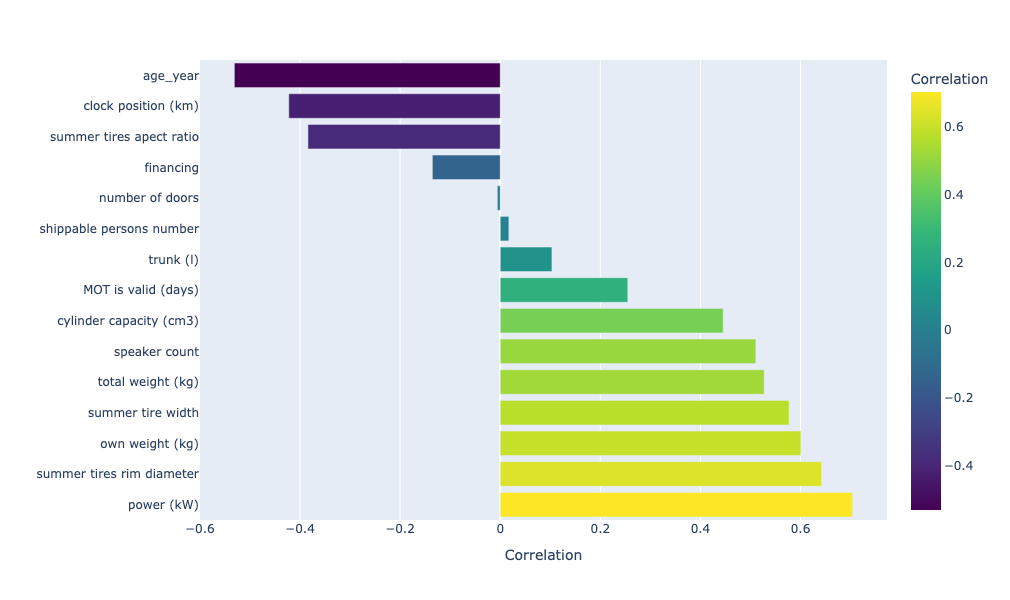

In [844]:

# Create a bar plot for the correlation values
fig_corr = px.bar(correlations_filtered, x='correlation', y='other_variable', color='correlation',
             labels={'correlation': 'Correlation', 'other_variable': ''},
             color_continuous_scale='Viridis')

# Set the title and labels
fig_corr.update_layout(
    xaxis_title="Correlation",
    yaxis_title='',
    width=800,
    height=600,
)

# Show the figure
fig_corr.show()


From the plot, we can see that the tires deatiles higly correlate with 'price (HUF)' probably because these features tell a lot about the qualty of the car. On the other hand, 'age_year' and 'clocl position (km)' have the highest negative correlations with 'price (HUF)', that is not suprising since the more used ad more old the car it has less value. 

In [845]:
py.plot(fig_corr, filename = 'correlations_with_price', auto_open=False)

'https://plotly.com/~szDavid/81/'

In [848]:
df['financing'].unique()

array([ 25,  20, 100,  30,  40,  35,   0,  15,  10,  50,  45])

# Distrubutions of numeric values

In [522]:
print(f'Median price in Hungary: {int(df["price (HUF)"].median())}Ft')
print(f'Mean price in Hungary: {int(df["price (HUF)"].mean())}Ft')

print(f'Median price in Hungary: €{int(df["price (HUF)"].median()/375)}')
print(f'Mean price in Hungary: €{int(df["price (HUF)"].mean()/375)}')

Median price in Hungary: 3999999Ft
Mean price in Hungary: 6499155Ft
Median price in Hungary: €10666
Mean price in Hungary: €17331


In [566]:
df_price = df[['price (HUF)']].copy()
df_price['price (EUR)'] = np.ceil(df_price['price (HUF)'] / 375 / 1000).astype(int) * 1000
df_price_agg = df_price['price (EUR)'].value_counts().reset_index()
df_price_agg.columns = ['price (EUR)', 'Count']
df_price_agg.sort_values('price (EUR)', inplace=True)
df_price_agg

price (EUR)  Count
18          1000    648
1           2000   1943
2           3000   1814
0           4000   1983
5           5000   1636
..           ...    ...
188       294000      1
170       299000      1
171       307000      1
172       320000      1
173       323000      1

[197 rows x 2 columns]

In [593]:
from scipy.optimize import curve_fit
from scipy.stats import expon
import numpy as np

# define the form of the function we want to fit
def func(x, a, b):
    return a * np.exp(-b * x)

# get x and y data points
xdata = df_price_agg['price (EUR)'].head(120)
ydata = df_price_agg['Count'].head(120)

# fit the function to the data
params, params_covariance = curve_fit(func, xdata, ydata, p0=[2000, 1e-3],  )


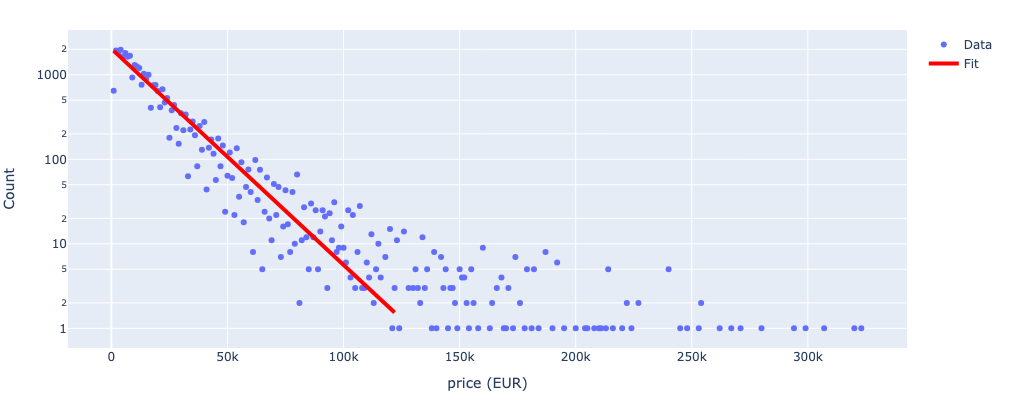

In [833]:
# create scatter plot of original data
fig_exponential = go.Figure()
fig_exponential.add_trace(go.Scatter(x=df_price_agg['price (EUR)'], y=df_price_agg['Count'], mode='markers', name='Data'))

# create line plot of fitted function
x_line = np.linspace(min(xdata), max(xdata), 100)
y_line = func(x_line, params[0], params[1])
fig_exponential.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Fit', line=dict(color='red', width=4)))

# Set log scale for y axis
fig_exponential.update_layout(
    yaxis=dict(
        type='log',
        #exponentformat = 'e',
        showexponent = 'all'
    ),
    #title="Exponential Fit on Scatter Plot",
    xaxis_title="price (EUR)",
    yaxis_title="Count",
    width=1000,
    height=400,
    margin=dict(t=30, b=30, l=30, r=30),
)

fig_exponential.show()

In [617]:
#py.plot(fig_exponential, filename = 'price_heavy_tail', auto_open=False)

'https://plotly.com/~szDavid/86/'

In [605]:
df_price_limited = df_price.copy()
df_price_limited.loc[df_price_limited['price (EUR)'] > 100000, 'price (EUR)'] = 100000
df_price_limited = df_https://plotly.com/~szDavid/86/price_limited['price (EUR)'].value_counts().reset_index()
df_price_limited.columns = ['price (EUR)', 'Count']
df_price_limited

price (EUR)  Count
0          4000   1983
1          2000   1943
2          3000   1814
3          6000   1806
4          8000   1685
..          ...    ...
95        85000      5
96        65000      5
97        89000      5
98        93000      3
99        81000      2

[100 rows x 2 columns]

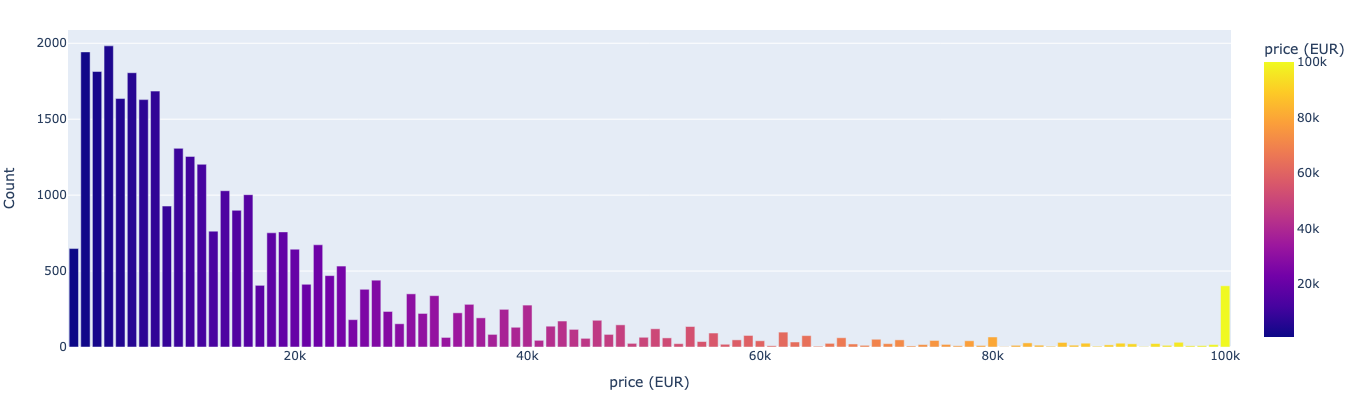

In [613]:
fig_price = px.bar(df_price_limited, x='price (EUR)', y='Count', color='price (EUR)')

# Set log scale for y axis
fig_price.update_layout(
    xaxis_title="price (EUR)",
    yaxis_title="Count",
    width=1000,
    height=400,
    margin=dict(t=30, b=30, l=30, r=30),
)

fig_price

In [615]:
py.plot(fig_price, filename = 'price_distribution', auto_open=False)

'https://plotly.com/~szDavid/83/'

## Distribution of numeric values

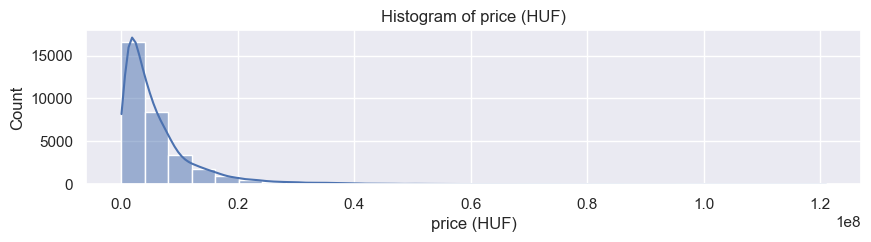

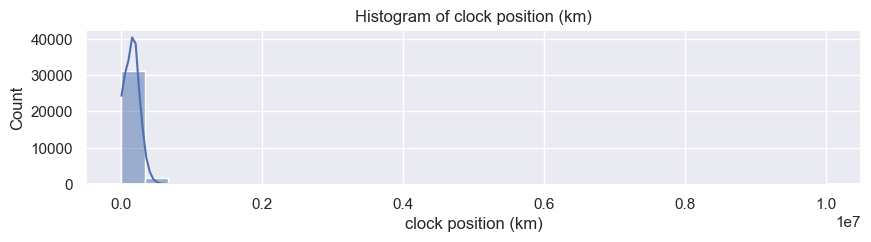

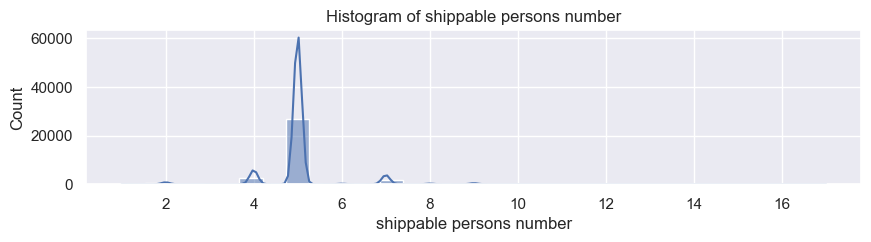

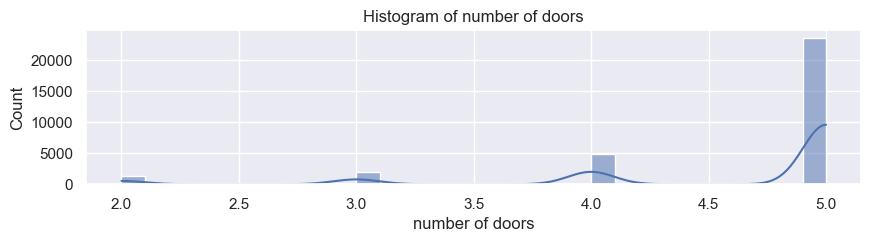

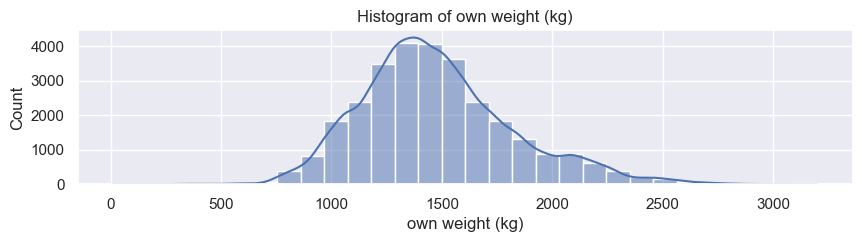

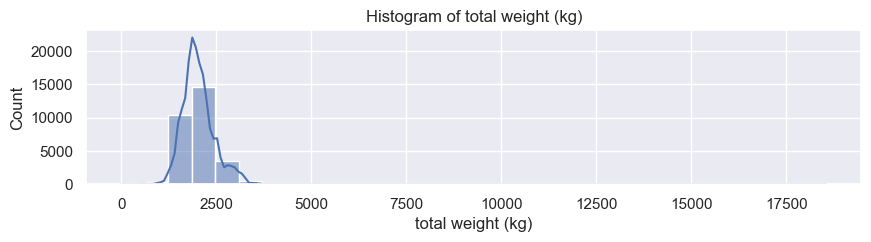

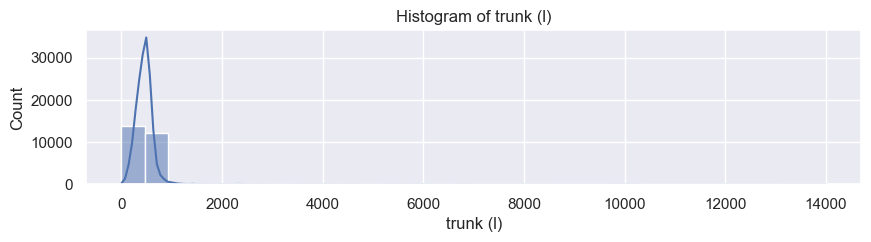

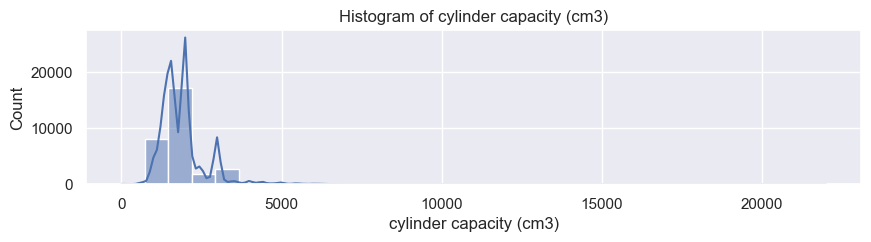

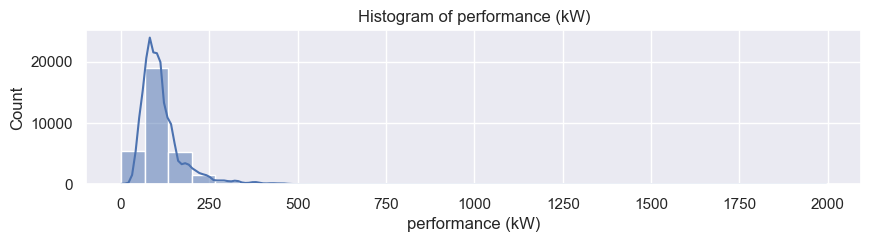

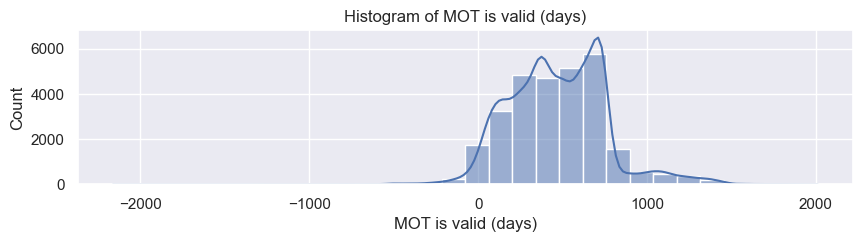

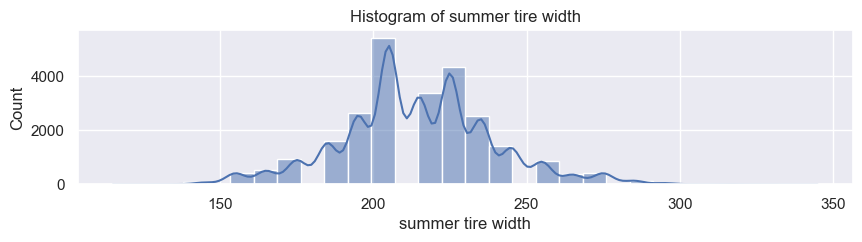

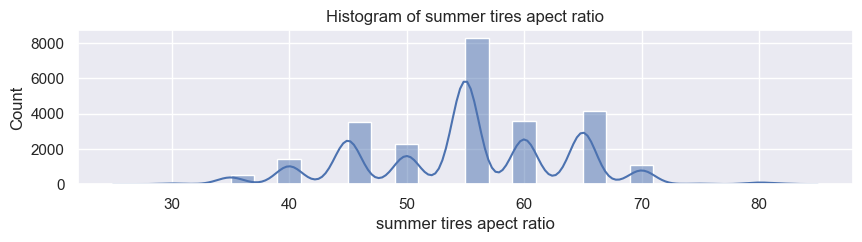

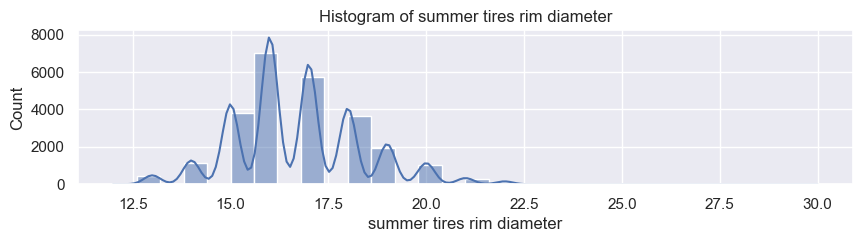

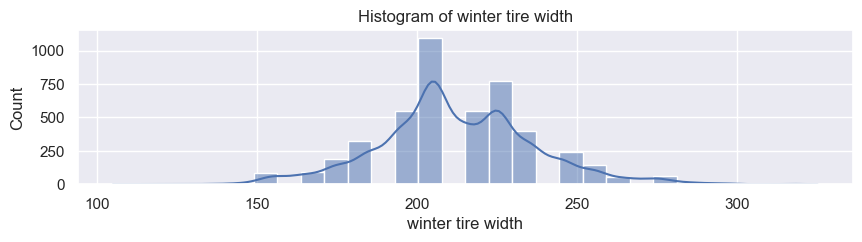

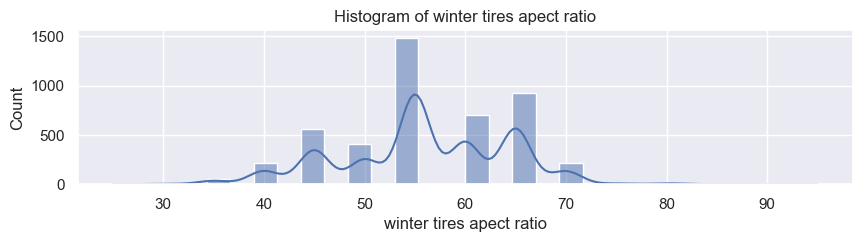

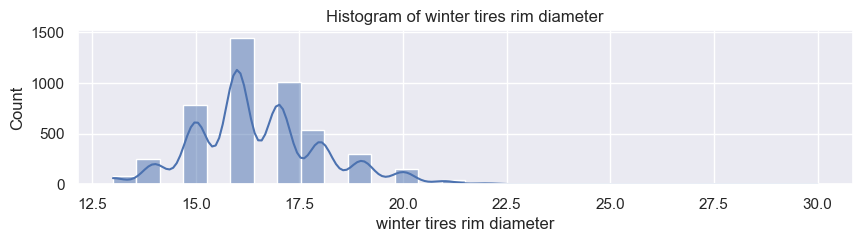

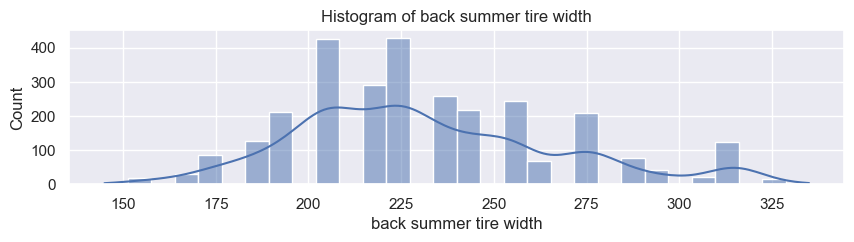

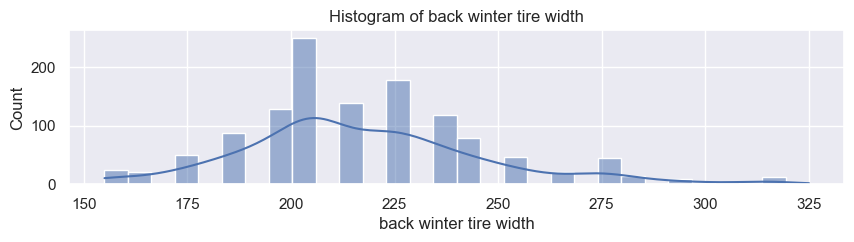

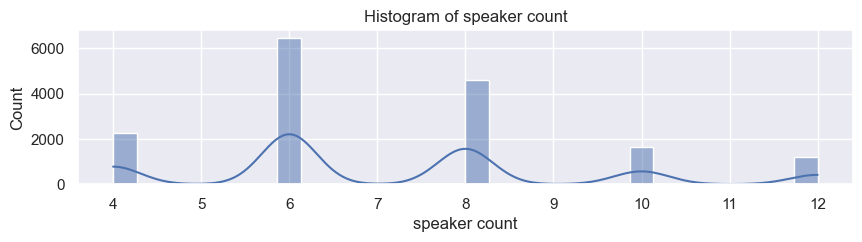

In [451]:
# make sure seaborn style is used
sns.set()

# iterate over the numerical columns and plot a histogram for each
for col in numeric_features:
    plt.figure(figsize=(10, 2))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

## Existance ratio of binary values

In [715]:
df_binary_correlations = get_correlations(df[list(binary_features) + ['price (HUF)']].astype(float))

In [720]:
df_binary_correlations = df_binary_correlations[
    (df_binary_correlations.variable1 == 'price (HUF)') |
    (df_binary_correlations.variable2 == 'price (HUF)')
].copy()

In [722]:
df_binary_correlations['Feature'] = np.where(
    df_binary_correlations['variable1'] == 'price (HUF)',
    df_binary_correlations['variable2'],
    df_binary_correlations['variable1'] 
)

In [724]:
df_exists_ratio = pd.DataFrame(df[binary_features].mean(), columns=['Ratio of exists']).reset_index(names='Feature')
df_exists_ratio.sort_values('Ratio of exists', ascending=True, inplace=True)
df_exists_ratio = pd.merge(df_exists_ratio, df_binary_correlations[['Feature', 'correlation']], on='Feature')
df_exists_ratio.head()

Feature  Ratio of exists  correlation
0                          amplifier         0.030639     0.156646
1                         anti-theft         0.032730     0.094530
2                 home mains charger         0.033064     0.143751
3  electrically adjustable headrests         0.035640     0.312015
4                  pedestrian airbag         0.035943     0.182408

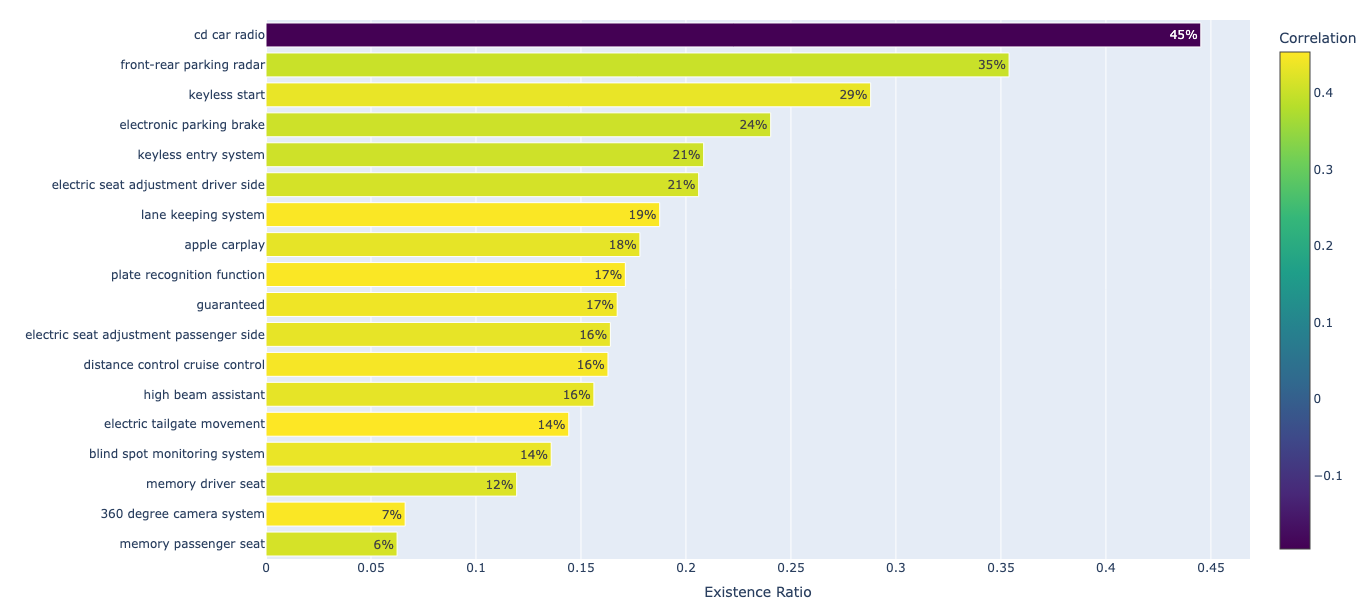

In [744]:
msk_exists = (df_exists_ratio['correlation']-0.15).abs() > 0.25

# Create bar plot
fig_common_features = go.Figure(data=[
    go.Bar(y=df_exists_ratio['Feature'][msk_exists], 
           x=df_exists_ratio['Ratio of exists'][msk_exists], 
           orientation='h',  # horizontal bars
           text=[f"{i:.0%}" for i in df_exists_ratio['Ratio of exists'][msk_exists]],  # Convert to percentage
           textposition='auto',  # display text inside bars
           hovertemplate = 'Correlation: %{marker.color:.2f}',  # hover text
           marker=dict(
               color=df_exists_ratio['correlation'][msk_exists], 
               colorscale='viridis', 
               line=dict(color='white', width=1),  # bar border
               colorbar=dict(title='Correlation')  # add color bar
           ))
])

# Set the title and labels
fig_common_features.update_layout(
    xaxis_title='Existence Ratio',
    yaxis_title='',
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    margin=dict(t=20, b=0, l=0, r=0),
)

fig_common_features.show()


In [750]:
#py.plot(fig_common_features, filename = 'common_features', auto_open=False)

'https://plotly.com/~szDavid/79/'

In [830]:
df_exists_ratio[msk_exists].to_csv('bool_features.csv', index=False)

# Value distribution in categorical features

In [174]:
translator = Translator()

def create_pie_chart(df, column, do_translate=False):
    # Calc distribution
    distribution = pd.DataFrame(df[column].value_counts()).reset_index()
    distribution.columns = [column, 'Count']
    
    if do_translate:
        hun_values = list(distribution[column])
        translations = translator.translate(hun_values, src='hu', dest='en')
        translations = [x.text for x in translations]
        rename_map = dict(zip(hun_values, translations))
        distribution[column] = distribution[column].replace(rename_map)
    
     # This creates a donut chart.
    fig = go.Figure(data=[
             go.Pie(
                 labels=distribution[column], 
                 values=distribution['Count'],
                 hole=.6, # The 'hole' parameter is the hole size.
                 marker=dict(line=dict(color='#000000', width=1)))]
         )

    fig.update_traces(textposition='inside', textinfo='percent+label')

    fig.update_layout(
        title_text="Distribution of "+column,  # Add a title
        autosize=False, 
        width=600, 
        height=600,
        showlegend=False,
        margin=dict(t=30, b=30, l=30, r=30),
    )

    return fig

In [657]:
df_categorical = df[categorical_features].copy()

In [658]:
for col in categorical_features:
    df_categorical = bucketing(df_categorical, col, 300)

df_categorical.head()

Drop column vehicle history


condition  \
link                                                            
https://www.hasznaltauto.hu/szemelyauto/volkswa...     Kitűnő   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Megkímélt   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...     Kitűnő   
https://www.hasznaltauto.hu/szemelyauto/renault...     Kitűnő   
https://www.hasznaltauto.hu/szemelyauto/mercede...     Normál   

                                                                          design  \
link                                                                               
https://www.hasznaltauto.hu/szemelyauto/volkswa...                         Sedan   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Városi terepjáró (crossover)   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...  Városi terepjáró (crossover)   
https://www.hasznaltauto.hu/szemelyauto/renault...  Városi terepjáró (crossover)   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Városi terepjáró (crossover)   

                                                   financing     color  \
link                                                                     
https://www.hasznaltauto.hu/szemelyauto/volkswa...        25    fekete   
https://www.hasznaltauto.hu/szemelyauto/mercede...        20     fehér   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...        20       kék   
https://www.hasznaltauto.hu/szemelyauto/renault...       100  sötétkék   
https://www.hasznaltauto.hu/szemelyauto/mercede...        20     fehér   

                                                              type of climate  \
link                                                                            
https://www.hasznaltauto.hu/szemelyauto/volkswa...  Digitális többzónás klíma   
https://www.hasznaltauto.hu/szemelyauto/mercede...   Digitális kétzónás klíma   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...             Manuális klíma   
https://www.hasznaltauto.hu/szemelyauto/renault...             Manuális klíma   
https://www.hasznaltauto.hu/szemelyauto/mercede...             Manuális klíma   

                                                         roof    fuel  \
link                                                                    
https://www.hasznaltauto.hu/szemelyauto/volkswa...  Lemeztető   Dízel   
https://www.hasznaltauto.hu/szemelyauto/mercede...              Dízel   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...             Benzin   
https://www.hasznaltauto.hu/szemelyauto/renault...             Benzin   
https://www.hasznaltauto.hu/szemelyauto/mercede...              Dízel   

                                                   cylinder arrangement  \
link                                                                      
https://www.hasznaltauto.hu/szemelyauto/volkswa...                Soros   
https://www.hasznaltauto.hu/szemelyauto/mercede...                Soros   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...                Soros   
https://www.hasznaltauto.hu/szemelyauto/renault...                Soros   
https://www.hasznaltauto.hu/szemelyauto/mercede...                Soros   

                                                         drive  \
link                                                             
https://www.hasznaltauto.hu/szemelyauto/volkswa...  Első kerék   
https://www.hasznaltauto.hu/szemelyauto/mercede...   Összkerék   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...  Első kerék   
https://www.hasznaltauto.hu/szemelyauto/renault...  Első kerék   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Első kerék   

                                                                            gearbox  \
link                                                                                  
https://www.hasznaltauto.hu/szemelyauto/volkswa...            Automata (6 fokozatú)   
https://www.hasznaltauto.hu/szemelyauto/mercede...  Automata (7 fokozatú tiptronic)   
https://www.hasznaltauto.hu/szemelyauto/dacia/d...            Manuális 

In [179]:
df_colors = pd.DataFrame(df_categorical['color'].value_counts()).reset_index()
df_colors.columns = ['Color', 'Count']
df_colors.to_csv('color_distribution.csv', index=False)
df_colors['Color'] = df_colors['Color'].replace( 
    {
     'fekete': 'black',
     'fehér': 'white',
     'szürke': 'gray',
     'ezüst': 'silver',
     'sötétszürke': 'dark gray',
     'kék': 'blue',
     'piros': 'red',
     'sötétkék': 'dark blue',
     'világosszürke': 'light gray',
     'barna': 'brown',
     'bordó': 'burgundy',
     'zöld': 'green',
     'Other': 'other'
    }
)
df_colors.to_csv('color_distribution.csv', index=False)

color_distribution = df_colors[df_colors.Color != ''] # Remove unknown colors

In [180]:
# Update color mapping to handle all colors
colors = {
    'black': '#000000',
    'white': '#FFFFFF',
    'gray': '#808080',
    'silver': '#C0C0C0',
    'other': '#FFA500',
    'dark gray': '#5A5A5A',
    'blue': '#0000FF',
    'red': '#FF0000',
    'dark blue': '#00008B',
    'light gray': '#D3D3D3',
    'brown': '#A52A2A',
    'burgundy': '#800020',
    'green': '#008000',
}

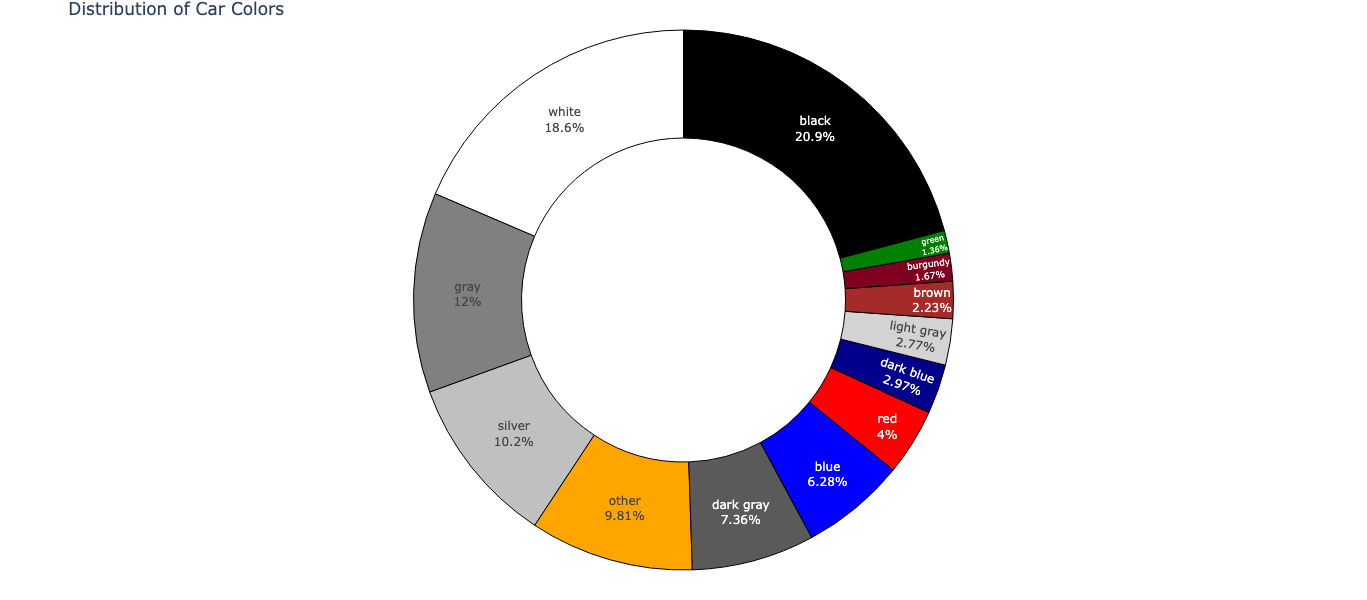

In [181]:
# Map the colors
color_mapping = color_distribution['Color'].map(colors)

fig_color = go.Figure(
    data=[go.Pie(labels=color_distribution['Color'], 
     values=color_distribution['Count'], 
     hole=.6,
     marker=dict(colors=color_mapping, line=dict(color='#000000', width=1)))]
)

fig_color.update_traces(textposition='inside', textinfo='percent+label')

fig_color.update_layout(
    title_text="Distribution of Car Colors", 
    autosize=False, 
    width=600, 
    height=600,
    showlegend=False,
    margin=dict(t=30, b=30, l=30, r=30)  # smaller margins
)

# Upload your plot
#py.plot(fig_color, filename = 'color_distribution', auto_open=False)

fig_color.show()


In [182]:
df_categorical['city'] = df_categorical['city'].str.strip().str.capitalize()

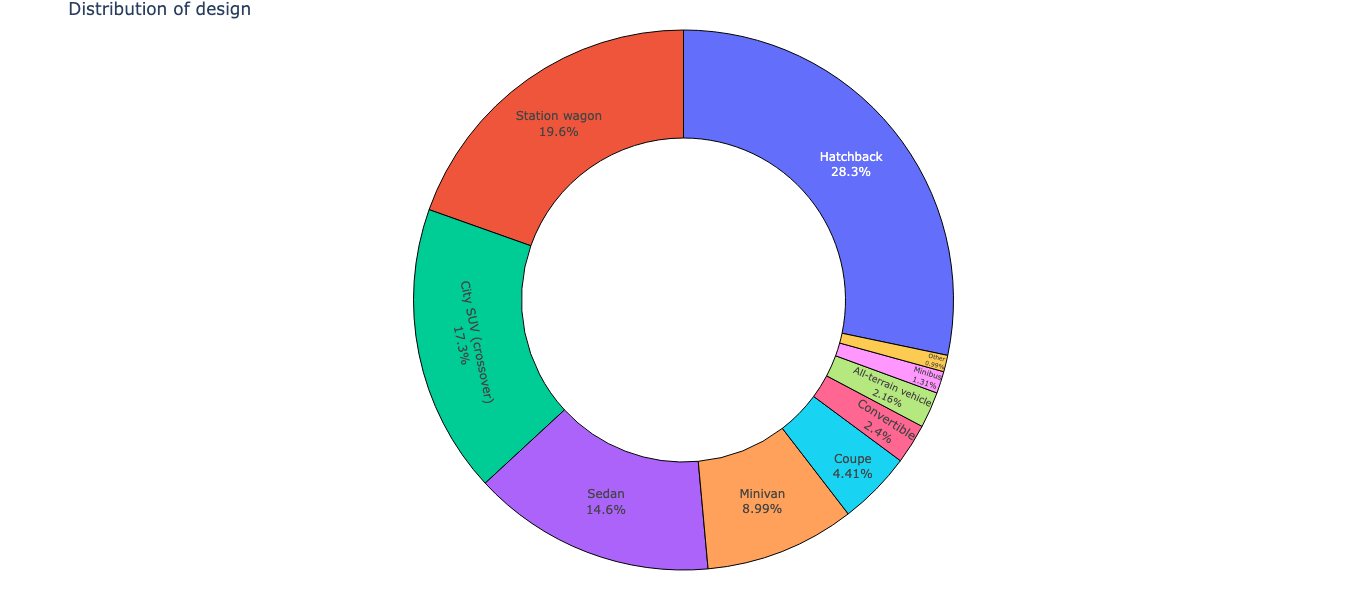

In [466]:
fig_car_type = create_pie_chart(df_categorical, 'design', do_translate=True)
fig_car_type

In [659]:
df_categorical['brand'] = bucketing(df[['brand']].copy(), column='brand', threshold=500).values

In [660]:
df_categorical['brand'] = df_categorical['brand'].str.capitalize()

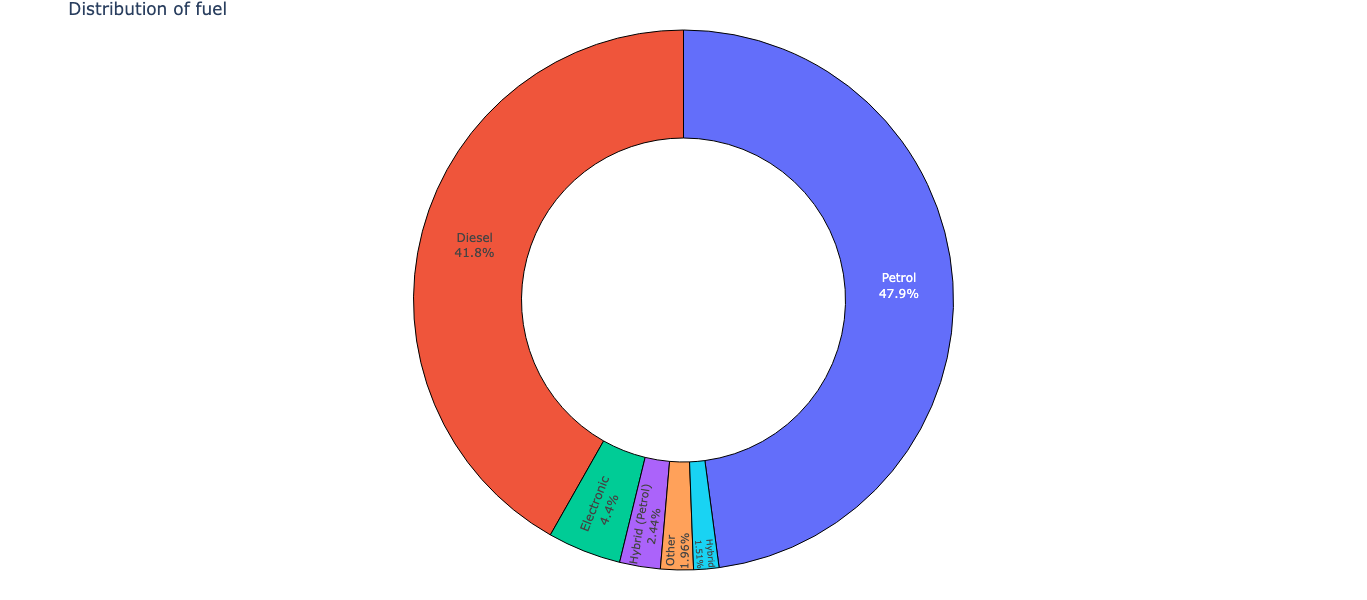

In [187]:
fig_fuel = create_pie_chart(df_categorical, 'fuel', do_translate=True)
fig_fuel

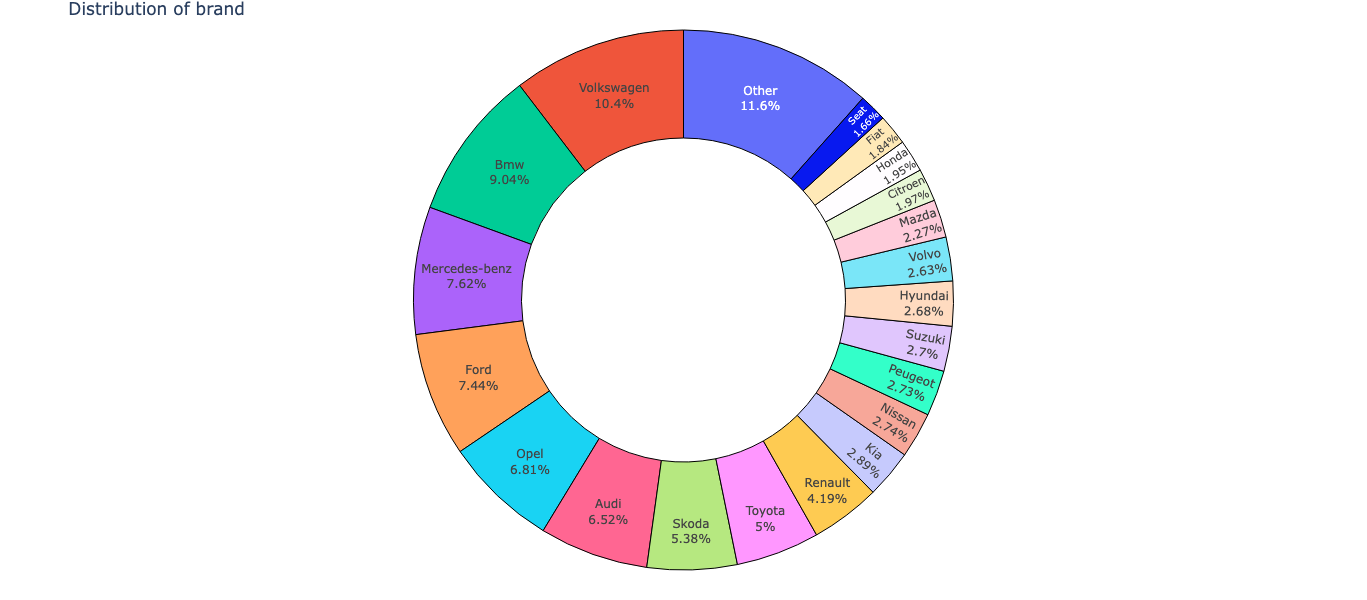

In [188]:
fig_brand = create_pie_chart(df_categorical, 'brand', do_translate=False)
fig_brand

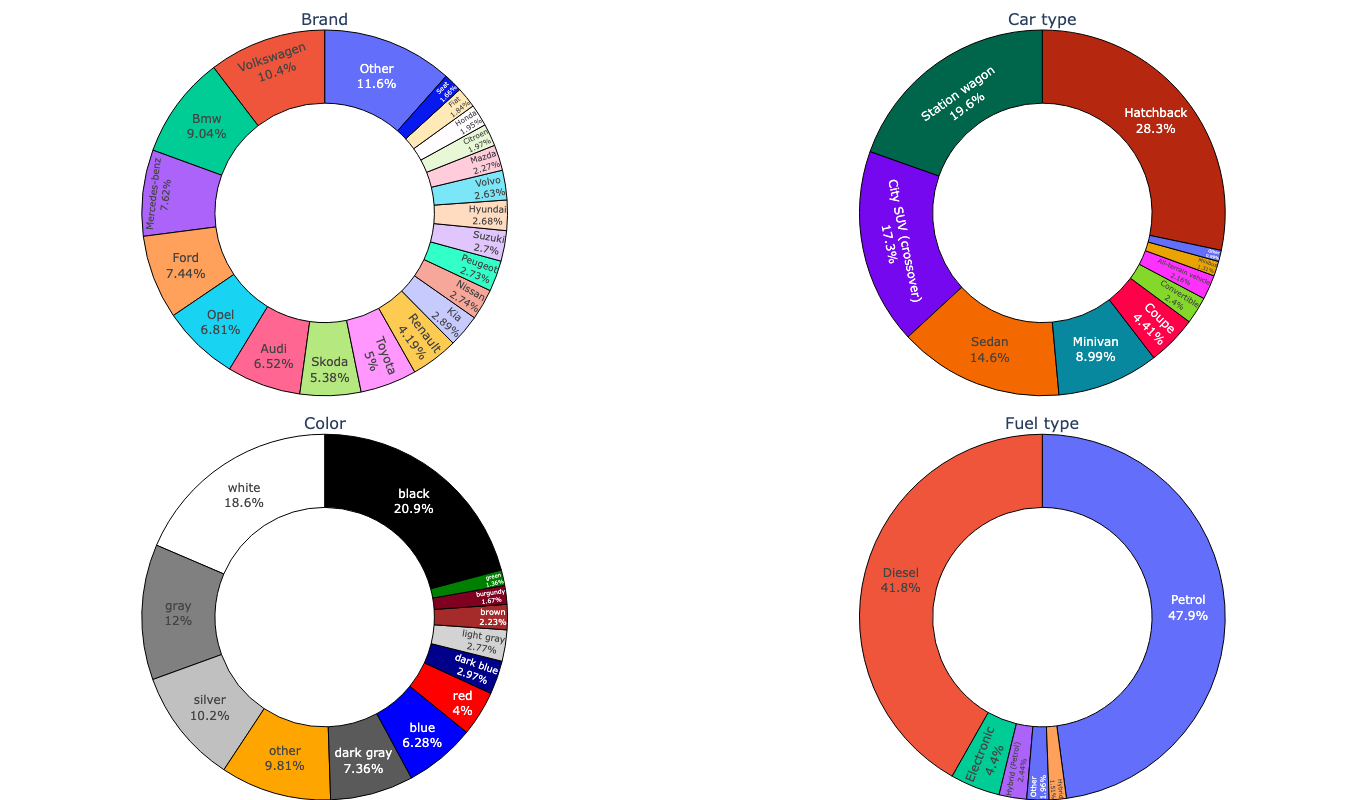

In [497]:
fig_donuts = make_subplots(rows=2, cols=2, subplot_titles=("Brand", "Car type", "Color", "Fuel type"),
                           specs=[[{'type': 'domain'}, {'type': 'domain'}], 
                                  [{'type': 'domain'}, {'type': 'domain'}]], 
                           vertical_spacing=0.05, 
                           horizontal_spacing=0.05)

fig_donuts.add_trace(fig_brand.data[0], row=1, col=1)
fig_donuts.add_trace(fig_car_type.data[0], row=1, col=2)
fig_donuts.add_trace(fig_color.data[0], row=2, col=1)
fig_donuts.add_trace(fig_fuel.data[0], row=2, col=2)

fig_donuts.update_layout(
    #title_text="Distribution of some categorical features", 
    title_x=0.5,
    autosize=False, 
    width=800, 
    height=800,
    showlegend=False,
    margin=dict(t=30, b=0, l=0, r=0)  # smaller margins
)

fig_donuts.show()


In [495]:
#py.plot(fig_donuts, filename = 'categorical_distributions', auto_open=False)

'https://plotly.com/~szDavid/71/'

In [669]:
vc = df_categorical['design'].value_counts()
(vc/np.sum(vc)*100).round(1)

Ferdehátú                       28.3
Kombi                           19.6
Városi terepjáró (crossover)    17.3
Sedan                           13.5
Egyterű                          9.0
Coupe                            4.4
Cabrio                           2.4
Terepjáró                        2.2
Kisbusz                          1.3
Lépcsőshátú                      1.1
Other                            1.0
Name: design, dtype: float64

In [701]:
df_weight = df[['own weight (kg)', 'design']].dropna().copy()
df_weight['own weight (kg)'] = ((df_weight['own weight (kg)']/100).round()*100).astype(int)
df_weight = df_weight.value_counts().rename('Count').reset_index()
df_weight = df_weight[df_weight.Count > 10]
df_weight

own weight (kg)                        design  Count
0               1200                     Ferdehátú   1575
1               1300                     Ferdehátú   1392
2               1100                     Ferdehátú   1237
3               1000                     Ferdehátú   1223
4               1400                         Kombi   1164
..               ...                           ...    ...
143             2400                        Pickup     11
144             1000  Városi terepjáró (crossover)     11
145              800                         Coupe     11
146             1800                        Pickup     11
147              900                        Cabrio     11

[148 rows x 3 columns]

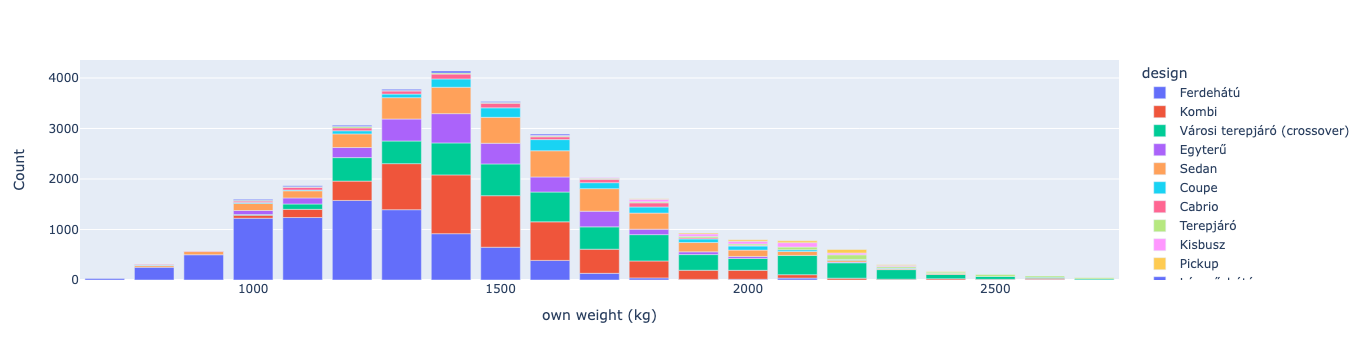

In [702]:
px.bar(df_weight, x='own weight (kg)', y='Count', color = 'design')

In [697]:
df_weight_avg = df[['own weight (kg)', 'design']].dropna().copy()
df_weight_avg = df_weight_avg.groupby('design').mean().reset_index()
df_weight_avg.sort_values('own weight (kg)', ascending=False, inplace=True)
df_weight_avg

design  own weight (kg)
10                        Pickup      2077.531707
6                        Kisbusz      1992.635328
13                     Terepjáró      1989.026515
14  Városi terepjáró (crossover)      1679.305606
2                          Coupe      1601.268293
11                         Sedan      1522.210186
7                          Kombi      1513.126392
1                         Cabrio      1462.318113
3                        Egyterű      1461.848191
12                         Sport      1345.400000
8                    Lépcsőshátú      1341.195122
5                      Ferdehátú      1220.551136
4                          Egyéb      1219.888889
0                          Buggy       595.000000
9                      Mopedautó       368.909091

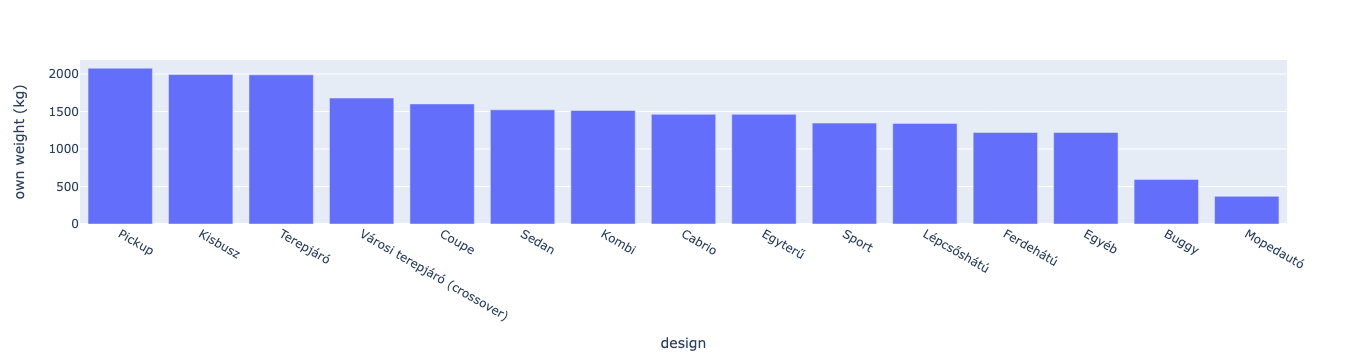

In [698]:
px.bar(df_weight_avg, x='design', y='own weight (kg)')

In [674]:
vc = df_categorical['fuel'].value_counts()
(vc/np.sum(vc)*100).round(1)

Benzin             47.9
Dízel              41.8
Elektromos          4.4
Hibrid (Benzin)     2.4
Other               2.0
Hibrid              1.5
Name: fuel, dtype: float64

# Check location data

## Where can I find most of the cars?

In [45]:
# Check the price distrubution in the country
df_hun_city_location = pd.read_csv('all_hun_settlement.csv')
df_hun_city_location.drop_duplicates('cleaned_settlement', inplace=True)
df_hun_city_location

zip           settlement short  latitude  longitude cleaned_settlement
0     1011  Budapest I. kerület    BU   47.5011    19.0469           budapest
161   2000           Szentendre    PE   47.6667    19.0833         szentendre
165   2009     Pilisszentlászló    PE   47.7167    19.0000   pilisszentlászló
166   2011           Budakalász    PE   47.6167    19.0500         budakalász
169   2014             Csobánka    PE   47.6333    18.9667           csobánka
...    ...                  ...   ...       ...        ...                ...
4062  9982             Kétvölgy    VA   46.8833    16.2167           kétvölgy
4063  9982               Orfalu    VA   46.8833    16.2833             orfalu
4064  9983          Alsószölnök    VA   46.9278    16.2086        alsószölnök
4065  9983          Szakonyfalu    VA   46.9167    16.2333        szakonyfalu
4066  9985         Felsőszölnök    VA   46.8797    16.1731       felsőszölnök

[3142 rows x 6 columns]

In [335]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler(feature_range=(10, 50))  # Scale to range 10-50, adjust as needed


In [767]:
# Calculate the median car prices for areas in in hungary
df_coordinates = pd.merge(
    df[['price (HUF)', 'city']], # Remove extramly high prices over 20M 
    df_hun_city_location[['cleaned_settlement', 'longitude', 'latitude']],
    left_on='city', 
    right_on='cleaned_settlement',
    how='inner'
)
#df_coordinates.rename(columns={'price (HUF)': 'price (EUR)'}, inplace=True)
df_coordinates['price (HUF)'] /= 375 # Change it to EUR
df_coordinates.drop(columns=['cleaned_settlement'], inplace=True)
#df_coordinates['longitude'] = df_coordinates['longitude'].round(1)#/3).round(1)
#df_coordinates['latitude'] = df_coordinates['latitude'].round(1)#/3).round(1)
df_coordinates = df_coordinates.groupby(['city', 'longitude','latitude']).agg(['median', 'count'])
df_coordinates.columns = ['Median price (EUR)', 'Count of cars']
df_coordinates.reset_index(inplace=True)
df_coordinates['Median price (EUR)'] = ((df_coordinates['Median price (EUR)']/100).round()*100).astype(int)

# Fit and transform 'Count of cars' column
df_coordinates['scaled_count'] = scaler.fit_transform(df_coordinates[['Count of cars']])
df_coordinates['scaled_count'] = df_coordinates['scaled_count'].astype(int)

df_coordinates = df_coordinates[df_coordinates['Count of cars'] > 50]
df_coordinates['city'] = df_coordinates['city'].str.capitalize()
df_coordinates.head()

city  longitude  latitude  Median price (EUR)  Count of cars  \
38         Baja    18.9667   46.1833                6300            109   
115  Budakalász    19.0500   47.6167               13900             90   
117    Budapest    19.0469   47.5011               15200           5765   
118     Budaörs    18.9602   47.4531               26600            784   
136  Békéscsaba    21.1000   46.6833                8000            358   

     scaled_count  
38             10  
115            10  
117            50  
118            15  
136            12

In [773]:
df_coordinates['Median price (EUR)'].max()

26600

In [774]:
df_coordinates['Median price (EUR)'].min()

4400

In [768]:
df_coordinates.to_csv('city_stats.csv', index=False)

## Medium price of the places

In [404]:
colorscale = [
    [0, 'blue'],  
    [0.05, 'green'],    
    [0.15, 'yellow'],   
    [0.5, 'orange'],   
    [1, 'red'],   
]

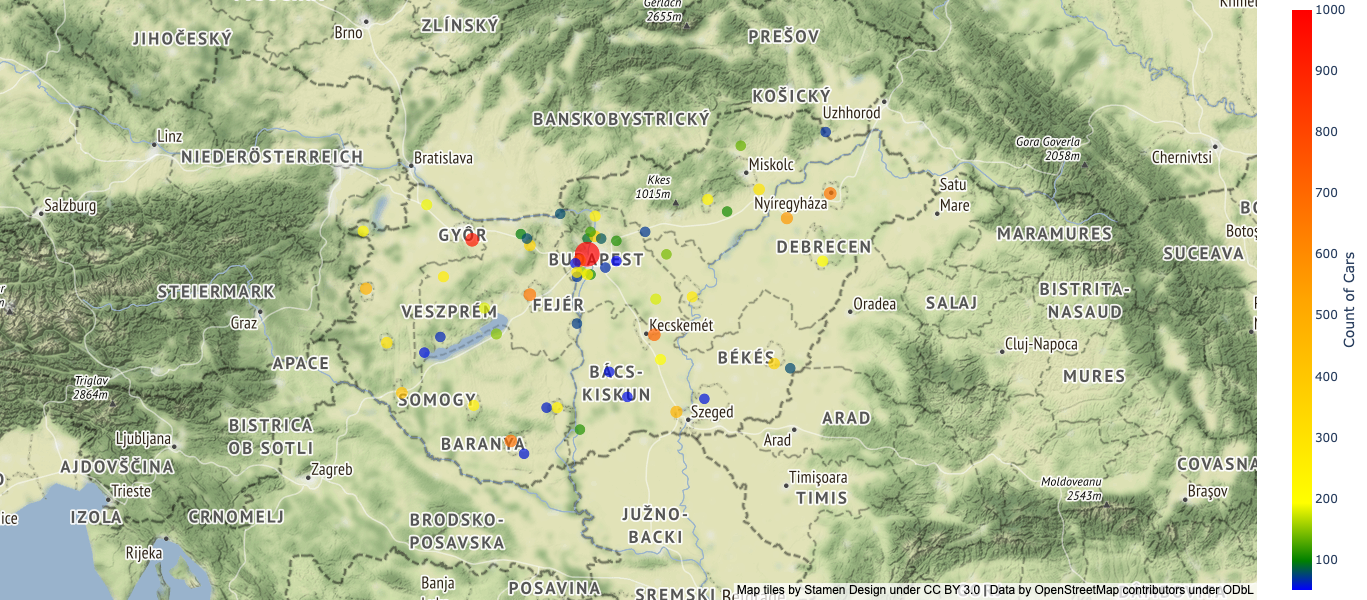

In [754]:
fig_count = go.Figure(data=go.Scattermapbox(
    lat=df_coordinates.latitude, 
    lon=df_coordinates.longitude, 
    mode='markers',
    marker=dict(
        size=df_coordinates['scaled_count'],
        color=df_coordinates['Count of cars'], 
        colorscale=colorscale, 
        cmin=50, cmax=1000,
        sizemode='area',  # Marker size represents area
        sizeref=0.15,  # Scale marker size
        sizemin=4,  # Minimum marker size
        colorbar=dict(
            title="Count of Cars",  # Title displayed beside the color bar
            titleside="right",  # Specifies which side of the color bar the title is on
            titlefont=dict(size=14),  # Specifies the size of the color bar's title
            thickness=20,  # Specifies the thickness of the color bar
            tickfont=dict(size=12),  # Specifies the size of the color bar's tick labels
        ),
    ),
    text='City: ' + df_coordinates['city'] + '<br>Count of cars: ' + df_coordinates['Count of cars'].astype(str),
    hovertemplate='%{text}<extra></extra>',
))

fig_count.update_layout(
    #title='Car Price Distribution in Hungary',  
    mapbox_style="stamen-terrain",
    mapbox_center_lat=47.16, 
    mapbox_center_lon=19.50,  
    mapbox_zoom=6, 
    autosize=False,
    width=700,  
    height=600,
)           

fig_count.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig_count.show()


In [755]:
#py.plot(fig_count, filename = 'count_of_cars_in_cities', auto_open=False)

'https://plotly.com/~szDavid/73/'

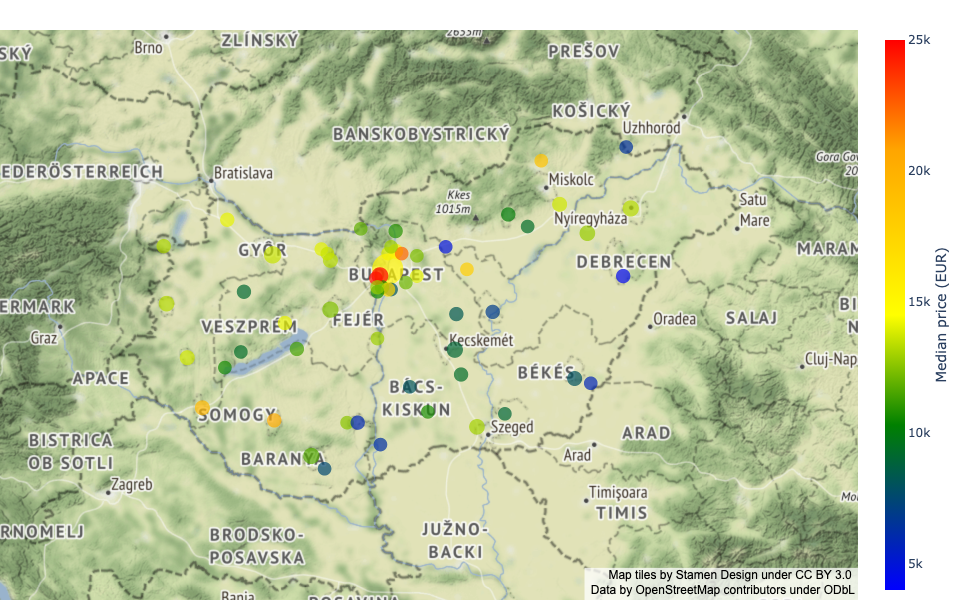

In [776]:
colorscale2 = [
    [0, 'blue'],  
    [0.3, 'green'],    
    [0.5, 'yellow'],   
    [0.8, 'orange'],   
    [1, 'red'],   
]

fig_med_price = go.Figure(data=go.Scattermapbox(
    lat=df_coordinates.latitude, 
    lon=df_coordinates.longitude, 
    mode='markers',
    marker=dict(
        size=df_coordinates['scaled_count'],
        color=df_coordinates['Median price (EUR)'], 
        colorscale=colorscale2, 
        cmin=4000, cmax=25000,
        sizemode='area',  # Marker size represents area
        sizeref=0.1,  # Scale marker size
        sizemin=4,  # Minimum marker size
        colorbar=dict(
            title="Median price (EUR)",  # Title displayed beside the color bar
            titleside="right",  # Specifies which side of the color bar the title is on
            titlefont=dict(size=14),  # Specifies the size of the color bar's title
            thickness=20,  # Specifies the thickness of the color bar
            tickfont=dict(size=12),  # Specifies the size of the color bar's tick labels
        ),
    ),
    text=('City: ' + df_coordinates['city'] + 
          '<br>Medium car price: ' + 
          df_coordinates['Median price (EUR)'].astype(str) + 
        '<br>Count of cars: ' + df_coordinates['Count of cars'].astype(str)),
    hovertemplate='%{text}<extra></extra>',
))

fig_med_price.update_layout(
    #title='Medium car prices in Hungary cities',  
    mapbox_style="stamen-terrain",
    mapbox_center_lat=47.16, 
    mapbox_center_lon=19.50,  
    mapbox_zoom=6, 
    autosize=False,
    width=800,  
    height=600,
)           

fig_med_price.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig_med_price.show()


In [ ]:
py.plot(fig_med_price, filename = 'medium_prices', auto_open=False)

## Casual inference check

In [817]:
other_variables = list(correlations_filtered['other_variable']) + list(df_exists_ratio['Feature'][msk_exists])

In [825]:
msk_normal_price = df['price (HUF)'] < 1e7

In [826]:
np.mean(msk_normal_price)

0.8223171803497288

In [836]:
df.drop(columns=['treatment'], inplace=True)

In [828]:
from causalinference import CausalModel


# Define the outcome variable Y, treatment variable D and covariates X
Y = (df[msk_normal_price]['price (HUF)']/1e6).values.astype(np.float64)
D = np.where(df[msk_normal_price]['city'].isin(['budapest', 'budaörs', 'törökbálint', 'fót']), 1, 0).astype(np.float64)
X = df[msk_normal_price][other_variables]
X = X.fillna(X.median()).values.astype(np.float64)  

# Create the causal model
causal = CausalModel(Y, D, X)

# Estimate the propensity scores
causal.est_propensity()

# Perform the matching
causal.trim_s()
causal.stratify_s()
causal.est_via_matching()

# Print the estimated causal effect
print(causal.estimates)


/Users/davidszalai/anaconda3/lib/python3.10/site-packages/causalinference/core/summary.py:110: RuntimeWarning:

invalid value encountered in divide




Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.015      0.042     -0.355      0.723     -0.098      0.068
           ATC     -0.050      0.048     -1.053      0.292     -0.144      0.043
           ATT      0.147      0.040      3.722      0.000      0.070      0.225



In [798]:
df[other_variables].isna().sum()

power (kW)                                   839
back summer tire width                     30097
summer tires rim diameter                   7833
winter tires rim diameter                  28392
back winter tire width                     31772
own weight (kg)                             3483
summer tire width                           7833
winter tire width                          28392
total weight (kg)                           3786
speaker count                              16777
cylinder capacity (cm3)                     2336
tfidf_package                                  0
MOT is valid (days)                         4120
summer tires apect ratio                    7833
winter tires apect ratio                   28392
clock position (km)                            0
age_year                                       0
memory passenger seat                          0
360 degree camera system                       0
memory driver seat                             0
blind spot monitorin

# Density of used cars for sale

# Create a word cloud

In [14]:
with open('descriptions.txt', 'r') as file:
    descriptions = file.read()

In [48]:
# Create and generate a word cloud image
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

# Translate the hunarian terms into english
translations = Translator().translate(list(word_cloud.words_.keys()), src='hu', dest='en')
eng_word_cloud = {}
for i, word in enumerate(word_cloud.words_.keys()):
    eng_word_cloud[translations[i].text] = word_cloud.words_[word]

# Repalce hun with english
word_cloud.generate_from_frequencies(eng_word_cloud)

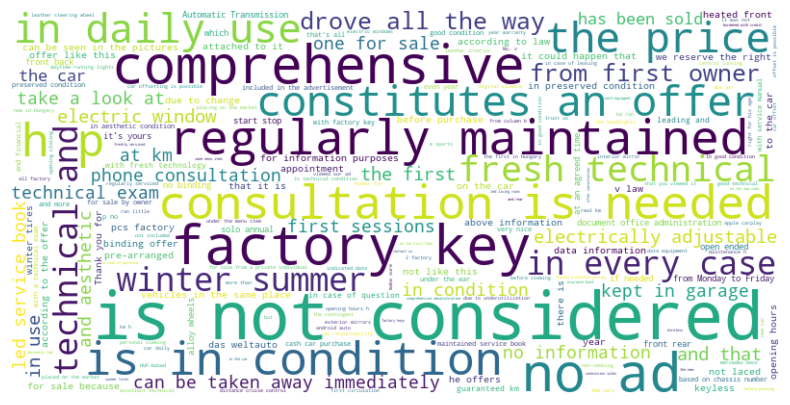

In [49]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('used_car_word_cloud.png')
plt.show()

# TFID statistics

1. Term Frequency (TF) is a measure of how frequently a term occurs in a document. It is simply the frequency of a word in a document. If a word appears often in a document, then the term frequency for that word will be high.

2. Inverse Document Frequency (IDF) is a measure of how important a term is. The idea is that words that appear in many documents are less important to the meaning of any particular document. For instance, words like 'is', 'the', 'and' etc., are common in all documents, and thus have less importance, so they should have low weight in the analysis.

By multiplying these two quantities together, we get a weight that ranks words within a document by their importance in the context of a larger corpus of documents.

In [445]:
tfid_words = pd.DataFrame((df[tfid_features] > 0).mean()).reset_index()
tfid_words.columns = ['Word', 'Term Frequency (TF)']
tfid_words.sort_values('Term Frequency (TF)', ascending=False, inplace=True)
tfid_words['Average TF-IDF'] = [df[df[x] > 0][x].mean() for x in tfid_words.Word] 
tfid_words['Word'] = tfid_words['Word'].str.replace('tfidf_', '')

# Add price correlations
df_tfid_price_corr = correlations_price[correlations_price.other_variable.str.contains('tfid_')].copy()
df_tfid_price_corr['other_variable'] = df_tfid_price_corr['other_variable'].str.replace('tfid_', '')
tfid_words = pd.merge(
    tfid_words, 
    df_tfid_price_corr[['other_variable', 'correlation']],
    left_on='Word',
    right_on='other_variable'
)

tfid_words = tfid_words[tfid_words.correlation.abs()>0.12]
tfid_words.to_csv('tfid_stats.csv', index=False)
tfid_words

Word  Term Frequency (TF)  Average TF-IDF other_variable  \
2           sell             0.374655        0.226772           sell   
4      technical             0.277887        0.225391      technical   
11          seat             0.189630        0.208822           seat   
15     equipment             0.178726        0.216273      equipment   
16      exchange             0.178029        0.318329       exchange   
31  it counts as             0.120877        0.219447   it counts as   
34         extra             0.119423        0.231088          extra   
39        system             0.113033        0.269118         system   
43           oil             0.109459        0.316398            oil   
55     spotlight             0.095769        0.202891      spotlight   
66           led             0.084623        0.221154            led   
67       package             0.084048        0.362057        package   
87           bmw             0.049338        0.417352            bmw   

    correlation  
2     -0.125407  
4     -0.155980  
11     0.143439  
15     0.138668  
16    -0.144659  
31     0.187040  
34     0.161275  
39     0.157184  
43    -0.124649  
55     0.126179  
66     0.156238  
67     0.340984  
87     0.208625

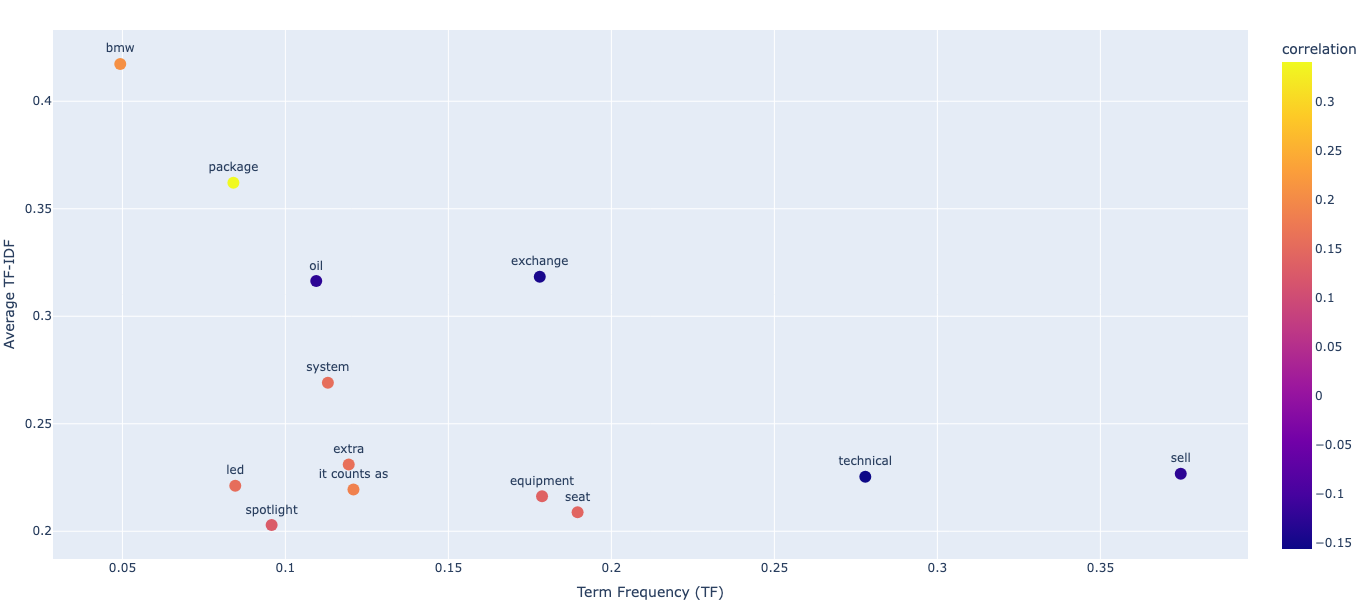

In [762]:
fig_tfidf = px.scatter(tfid_words, x='Term Frequency (TF)', y='Average TF-IDF', text='Word', color='correlation')

# Update size of the plot
fig_tfidf.update_layout(autosize=False, width=700, height=600, margin={"r":0,"t":30,"l":0,"b":0})

# Update size of the text and the markers
fig_tfidf.update_traces(
    marker=dict(size=12), textfont=dict(size=12), 
    textposition='top center'
)

fig_tfidf.show()

In [763]:
py.plot(fig_tfidf, filename = 'tfidf', auto_open=False)

'https://plotly.com/~szDavid/94/'

# Some adjustment on the data based on the statistics

In [102]:
df2 = df.drop(columns='vehicle history')

In [ ]:
df2.loc[df2['price (HUF)']>37500000, 'price (HUF)'] = 37500000

In [18]:
df2.to_parquet('../data/used_cars_training_data.parquet')